In [36]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline
# Next, we'll import the Iris flower dataset
from sklearn import datasets 

In [2]:
# Let's load the dataset
iris = datasets.load_iris()

In [8]:
X = iris.data[:, :4]  # we take the input features.
y = iris.target # we take the target features
# let's transfer it to a pandas dataframe
X_df = pd.DataFrame(data=X,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) 
y_df = pd.DataFrame(data=y,columns=['Class'])

In [10]:
# let's concat the input and target 
iris_df = pd.concat([X_df, y_df],axis = 1)

In [11]:
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Practice One: visualise your data and find the pattern

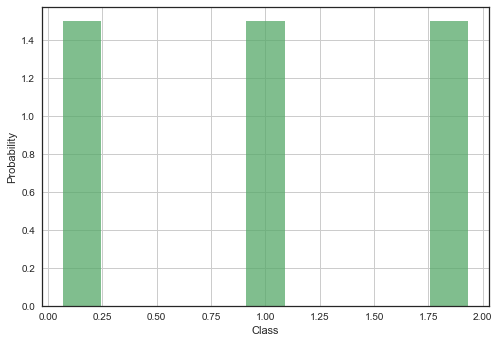

In [18]:
# practice 1.1, you will be asked to plot each class and each features to see the distributions 
# hint: you will need to use histgram
# hint: could you build a method to plot all the features by only running one cell instead of 4? 


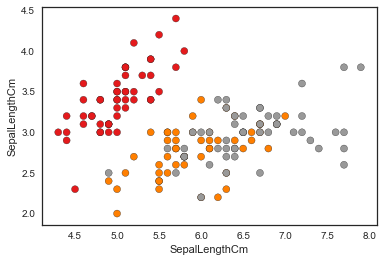

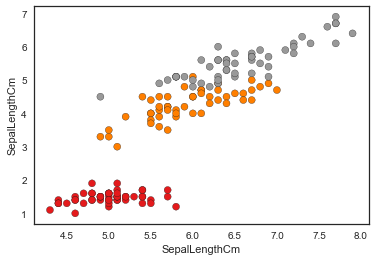

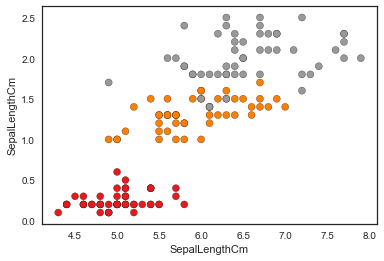

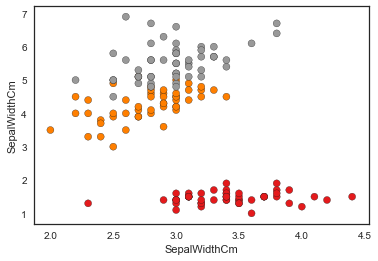

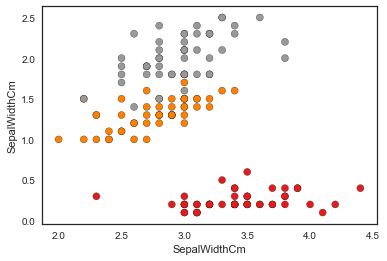

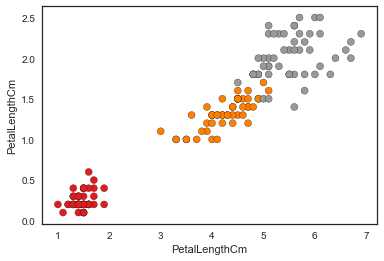

In [28]:
# practice 1.2, you will be asked to plot each input features along with another, eg: SepalLengthCm vs SepalWidthCm
# practice 1.2.1, you also need to color each plot by assigning the class, eg: in plot SepalLengthCm vs SepalWidthCm, which class does the point belong to
# hints: scatter with color class
# hints: could you plot all possible scatter plots into one like a matrix? (sns.pairplot)


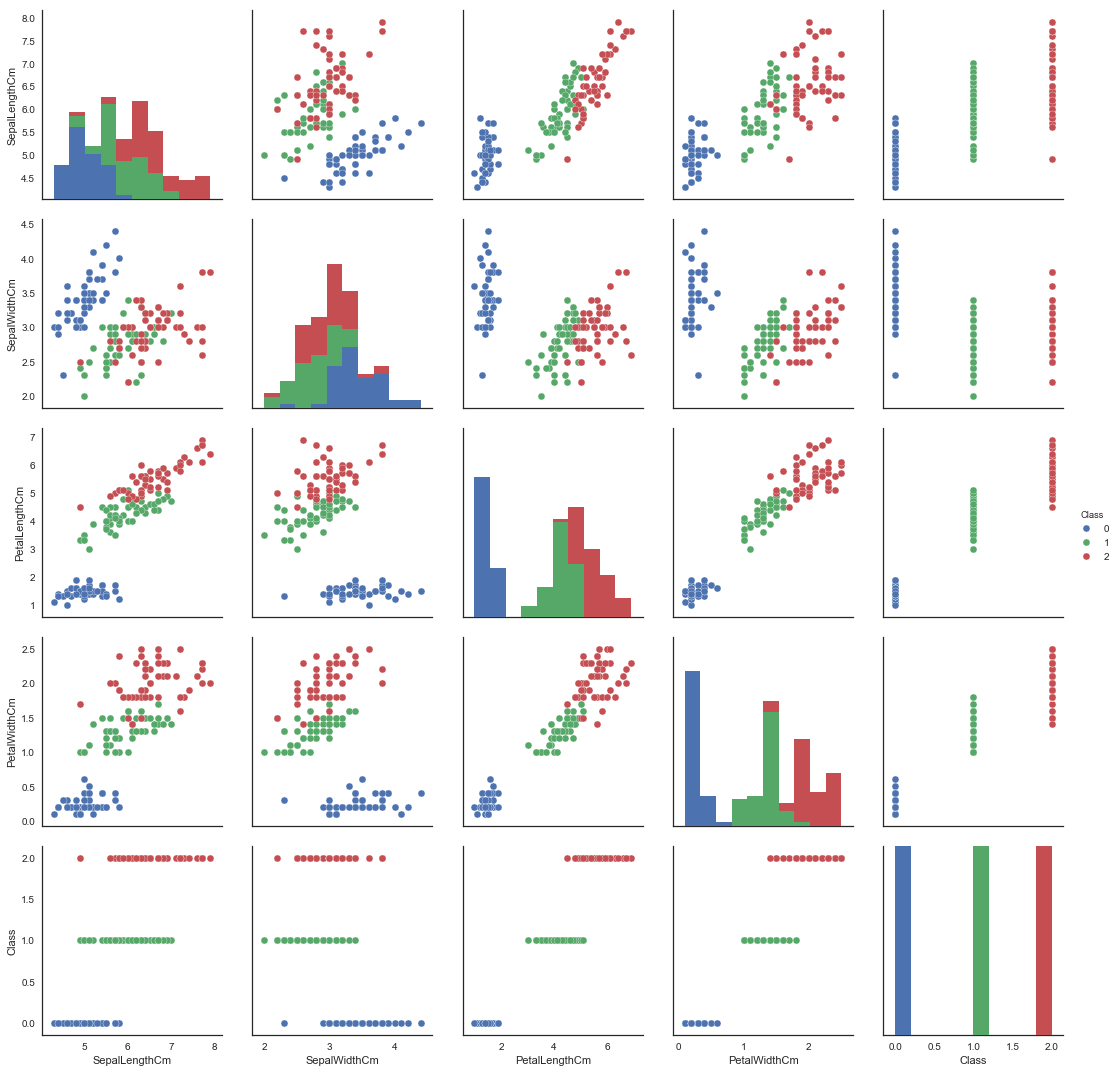

In [33]:
# another easy way to do this,sns.pairplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEF677FFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CEF33D09E8>]], dtype=object)

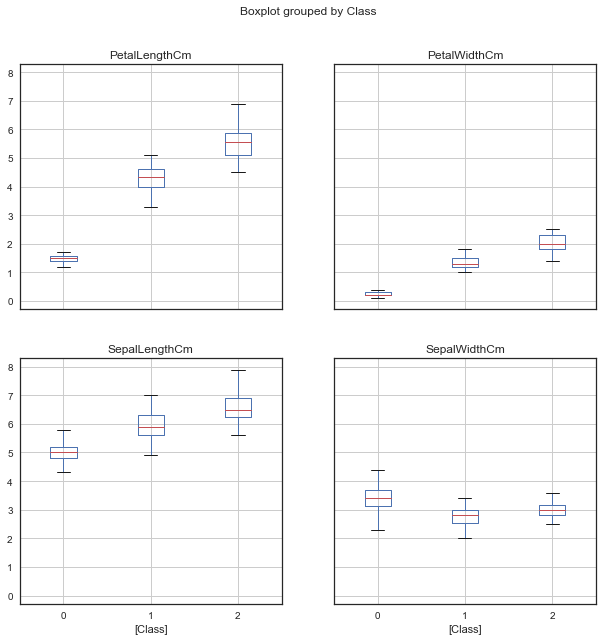

In [34]:
# practice 1.3 could you use boxplot to visualize the Q1,Q2,Q3 and mean/median for each feature? (data.boxplot(by='class',figsize=(10,10)))
# are all features in a same scale? if not, when would you do the standarlization(mean = 0) / normalization (minmiaxscale)? don't need answer...


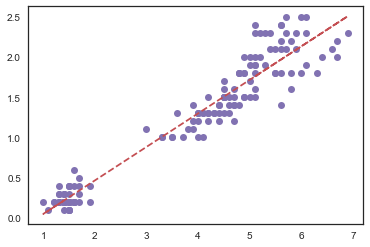

In [42]:
# practice 1.4 could you see which two features had a strong correlation? could you plot a linear regression curve
# of that two features? hits: fit = np.polyfit(X_df['PetalLengthCm'],X_df['PetalWidthCm'],1)
# fit_fn = np.poly1d(fit) is the function of liner regression
# you need to use plot twice



# Practice Two: Visualise your algorithm and performance

In [2]:
# oractice 2.1 some preparation
# in practice 1, could you find out which class is easy to be classified? 
# we will re-class our data mannually to only have 2 classes, one the is the class that you feel it is easy to be classified 
# another two class will be renamed as 'other' 
# hint: use replace to change the y_df, eg: y_df['class'] = y_df['class'].replace(x,x_new)



In [58]:
# please build the classfication with the following code:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.3, random_state=10)

modelrm = RandomForestClassifier(bootstrap=True, max_features=4, n_estimators=100, n_jobs=2, oob_score=True)
modelrm.fit(x_train,y_train)
predict_y = modelrm.predict(x_test)

feature_imp = pd.DataFrame(modelrm.feature_importances_,index = X_df.columns,columns=['importance']).sort_values('importance',ascending=False)
matrix = confusion_matrix(y_test, predict_y)

In [3]:
# practice 2.2 could you plot the model's feature importance (feature_imp) in a bar chart? 
#feature_imp


# Practice Three: Visualize 3d plot -- bonus, do not need to do

In [69]:
# Practice 3.1 let's go back to the practice 1.4 -- the liner regression, could you plot the regression line above the scatter? 

In [70]:
# The linear regression function should be f(x) = ax+b, how to get the best a and b to fit
# gradient descent should be the method

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [80]:
x_new = X_df['PetalLengthCm']
x = x_new.as_matrix()
y = X_df['PetalWidthCm'].as_matrix()

In [81]:
x.shape

(150,)

In [82]:
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -0.92, 0.54 214
Least Squares: -3.71, 82.90


Text(0.5,0.98,'Gradient Descent')

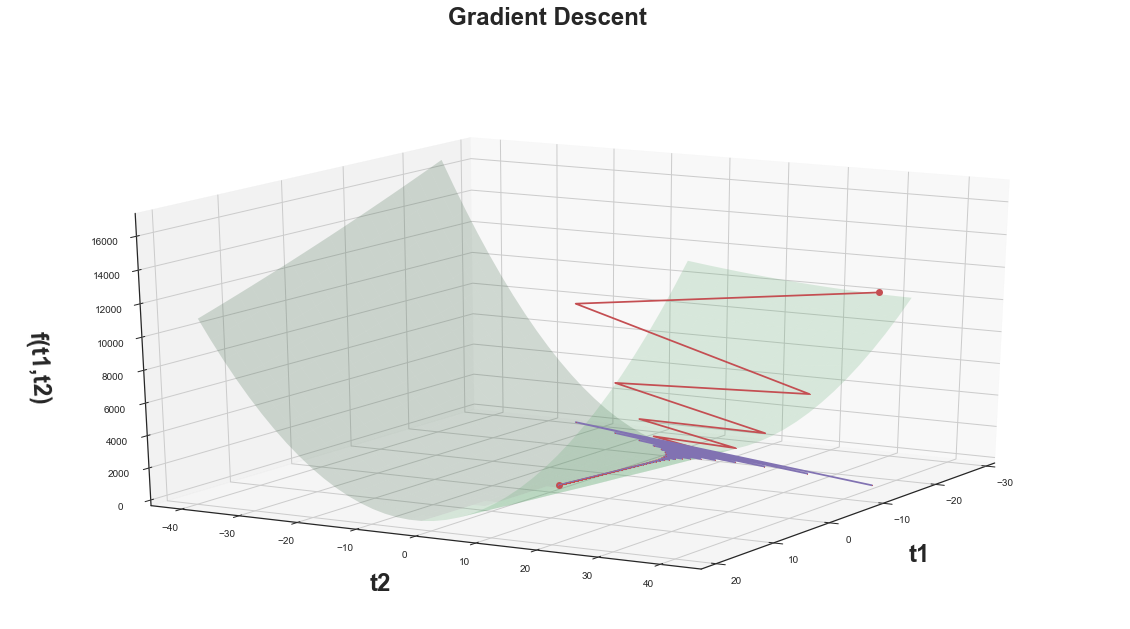

In [85]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='g', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('t1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('t2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(t1,t2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Gradient Descent", fontsize=24, fontweight='bold')

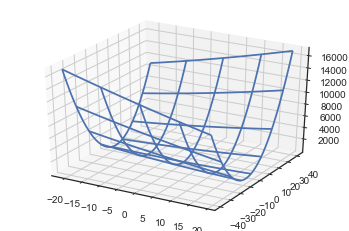

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
ax.plot_wireframe(M, B, Z, rstride=5, cstride=5)


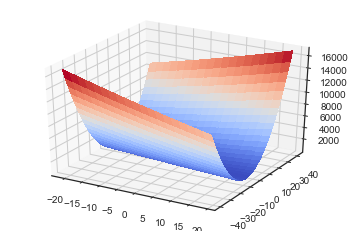

In [89]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(M, B, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)